# Esercitazione sulla Regressione Lineare

## Istruzioni
Valgono le stesse istruzioni delle esercitazioni precedenti. 

Scrivi il programma Python nella cella sotto il testo dell'esercizio (o creane una nuova). Stampa sempre a video il risultato finale per verificare la correttezza dell'esercizio.  Talvolta richiamiamo alcuni concetti importanti in una cella di codice sotto il testo dell'esercizio, prova a eseguirla ed eventualmente modificarla per assicurarti di aver capito il necessario.

**Nota.** Alcuni esercizi potrebbero richiedere una semplice risposta a delle domande. In questo caso potete scrivere la soluzione in una cella di tipo "Markdown".  


## Consegna
Valgono le regole delle esercitazioni precedenti.

E' obbligatorio **consegnare la soluzione di tutti gli esercizi** (tranne quelli marcati come opzionali) **entro l'inizio della lezione successiva** (in questo caso entro Lunedi' prossimo), nell'apposito assignment su iCorsi.  Per consegnare:
- eseguire l'intero notebook partendo da zero (`Kernel -> Restart & Run All`), e controllare che le soluzioni siano quelle attese;
- esportare il notebook in formato html (`File -> Download as...`) e consegnare il file risultante.

Nel caso non abbiate potuto completare uno o piu' esercizi, descrivete il problema incontrato e **consegnate comunque il file con il resto delle soluzioni**.

## Esercizio 1

### 1.1
Si consideri lo scatter plot in figura, che riporta la relazione tra la variabile indipendente ``x`` e la variabile target ``y``.
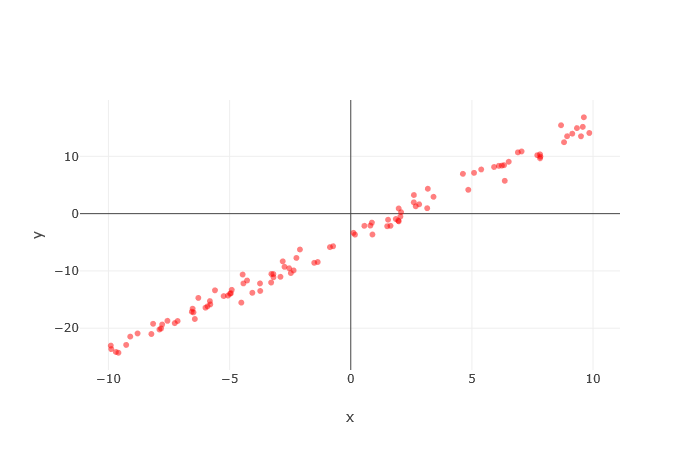

Una tra le seguenti 4 rette rappresenta il modello di regressione lineare che minimizza il sum-of-squares error (SSE). Quale? Motivate la vostra risposta.
- $y = x-4$
- $y = 2x-4$
- $y = 2x+4$
- $y = x-4$

**Soluzione esercizio 1.1**



### 1.2

Scrivere una funzione Python `computePerformance(x,y,w,b)` che calcola il SSE e il coefficiente di determinazione $R^2$ tra le osservazioni e la retta di regressione $y = wx + b$. 

La funzione riceve come argomenti di ingresso:
- x: numpy array contente una sequenza della variabile esplicativa 
- y: numpy array della stessa dimensione di $x$ contente una sequenza della variabile target
- w: coefficiente angolare della retta di regressione
- b: valore dell'intercetta della retta di regressione
e restituisce il SSE e l' $R^2$.    

Testate la funzione `computePerformance(x,y,w,b)` per vari valori di $w$ e $b$ su un set di osservazioni generato in questo modo:
- x: array di dimensione 1000 che assume valori casuali (es. valori generati da una distribuzione Gaussiana con media nulla e varianza unitaria)
- y=3x-1 + errore, dove errore è un array di variabili casuali Gaussiane a media nulla e varianza $0.1$, e  generato col comando `errore = 0.1*np.random.randn(1000)`

Se non avete fatto errori, dovreste osservare che il SSE è "basso" e l' $R^2$ è "prossimo a 1" per valori di $w$ e $b$ vicini a $3$ e $-1$.

In [4]:
# Solution


## Regressione lineare tramite pacchetto scikit-learn
Il pacchetto Python [scikit-learn](http://scikit-learn.org/stable/index.html) ci permette di calcolare un modello di regressione lineare (sia semplice che multipla) con pochi comandi e in maniera molto efficiente. 

Familiarizzate con i comandi principli si scikit-learn eseguendo le celle di questo esercizio oppure guardano gli esempi disponibili [online](http://scikit-learn.org/stable/modules/linear_model.html).

La seguente cella importa il modulo ``linear_model`` dal pacchetto ``scikit-learn`` dove sono definite classi e metodi necessari per costruire un modello di regressione lineare del tipo ``y = x*w+b``. Una volta importato il modulo ``linear_model``, viene costruito un oggetto ``linRegr`` della classe ``LinearRegression``. All'oggetto ``linRegr``viene applicato il metodo ``fit`` per ricavare il modello di regressione.

Nota: il metoto ``fit`` riceve come parametri di ingresso:
    - x: array di dimensione DUE con i valori delle variabili esplicative. L'array ha m righe e n colonne (dove m è il numero di osservazioni, e n è il numero di variabili esplicative. Nota bene: (i) n=1 nel caso di regressione semplice, (ii) x deve sempre essere un array di dimensione DUE!! Se avete un array di dimensione 1, fate il reshape dell'array tramite il comando np.reshape per trasformarlo in un vettore colonna di dimensione DUE)
    - y: array con i valori della variabile target di lunghezza m. Nota: y puo' anche essere un array di dimensione 1.
    
Una volta eseguito il comando fit, potete visualizzare i parametri ``w`` e ``b`` del modello di regressione accedendo agli attributi coef_ e intercept_ dell'oggetto ``linRegr``.     

In [5]:
from sklearn import linear_model

# Definisco l'oggetto della classe LinearRegression
linRegr = linear_model.LinearRegression()


m = len(x) # Numero di osservazioni
x = np.reshape(x,(m,1)) # Trasformo l'array delle variabili esplicative in un array di dimensione 2 (con m righe e 1 colonna)


# Costruisco il modello di regressione lineare
linRegr.fit(x,y)

# Stampo i parametri w e b del modello di regressione
w = linRegr.coef_
b = linRegr.intercept_
print(f"Parametri w: {w}")
print(f"Intercetta b: {b}")

ModuleNotFoundError: No module named 'sklearn'

Dato un qualunque set di valori della variabile indipendente ``x``, possiamo usare il modello di regressione lineare appena calcolato per stimare il valore della variabile target ``y``. Basta usare il metodo ``predict`` e fornire come ingresso i valori della variabile indipendente.

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# Predico l'uscita per i valori della variabile indipendente x
yhat = linRegr.predict(x)

# Plotto variabile target (vera) e variabile target stimata dal modello di regressione lineare
# ATTENZIONE: quando plottate lo scatter plot con plotly, i valori delle coordinate 'x' e 'y' devono essere array di dimensione UNO!!!!!

trace = [go.Scatter(x = x[:,0], y = y, mode = 'markers', name = 'Variabile target misurata'),
         go.Scatter(x = x[:,0], y = yhat, mode = 'markers', name = 'Variabile target stimata')]

layout = go.Layout(xaxis = dict(title = 'x: variabile esplicativa'), 
                   yaxis = dict(title = 'y: variabile target'))

fig = go.Figure(trace, layout)
py.iplot(fig)                    

Il metodo ``score`` fornisce il coefficiente di determinazione $R^2$ per il modello di regressione lineare calcolato e per un set di valori della variabile esplicativa ``x`` e della corrispondente variabile target ``y``.

In [ ]:
R2Tool = linRegr.score(x,y)
R2Tool 

### 1.3.1
Ripete l'esercizio sulla regressione semplice visto a lezione in cui si analizzava la relazione tra lunghezza della mano e altezza di una persona.

Nello specifico: 
- Calcolate i parametri del modello di regressione lineare `y=x*w+b` utilizzando il pacchetto scikit-learn
- Disegnare in un unico grafico lo scatter plot delle osservazioni e la retta di regressione 
- Calcolate il coeffiente di determinazione `R^2` utilizzando il metodo `score`
- Usate il metodo `predict` per calcolate il valore della funzione `y = x*w+b` per ogni valore di `x`. Calcolate il SSE

In [ ]:
# Punto 1

import pandas as pd

# Leggiamo il dataset
df = pd.read_table("http://users.stat.ufl.edu/~winner/data/stature_hand_foot.dat",
                   delim_whitespace=True, names = ["id", "sex", "stature", "hand", "foot"])
x = df["hand"].values # Variabile esplicativa
y = df["stature"].values # Variabile target 
m = len(x)
x = np.reshape(x,(m,1))

# Creiamo oggetto della classe LinearRegression
regLin = linear_model.LinearRegression()

# Calcoliamo modello di regressione lineare
regLin.fit(x,y)

w = regLin.coef_
b = regLin.intercept_

print(f"Modello di regression lineare: y=x{w}+{b}")

In [ ]:
# Punto 2


In [ ]:
# Punto 3


In [ ]:
# Punto 4


## Esercizio 2
Si consideri il dataset *kc_house_data.csv* disponibile su ``iCorsi``, che contiene informazioni sugli appartamenti venduti da Maggio 2014 a Maggio 2015 nella [King County](https://en.wikipedia.org/wiki/King_County,_Washington). Tra le informazioni disponibili sono presenti prezzo di vendita, caratteristiche dell'abitazione (es., dimensione dell'abitazione, numero di camere da letto, rapporto tra numero di bagni e camere da letto, etc.). Informazioni sul dataset si possono trovare [QUI](https://www.kaggle.com/harlfoxem/housesalesprediction).

L'obbiettivo di questo esercizio è costruire un modello di regressione lineare (sia semplice che multipla) che spieghi la relazione tra le variabili indipendenti (caratteristiche dell'abitazione) e la variabile target (prezzo di vendita).

Eseguite la cella per caricare il dataset (caricheremo solo l'1% dell'intero dataset). Tramite il comando ``train_test_split``, dividiamo in maniera randomica il dataset appena caricato in 2 datasets disgiunti, che chiameremo ``dfTrain`` e ``dfTest`` e che costituiranno, rispettivamente, il set di training (usato per costruire il modello di regressione lineare), e il set di test (usato per valutare le performance del modello di regressione costruito). La dimensione del set di training e del set di test sono il 70% e 30% del dataset.

Visualizzate i dataset caricati, guardate quali sono i nomi degli attributi e capite cosa rappresentano, aiutandovi con la descrizione disponibile online al seguente [link](https://www.kaggle.com/harlfoxem/housesalesprediction).

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

df = pd.read_csv('kc_house_data.csv')
df = df.sample(frac=0.01, random_state=42) # carico solo l'1% del dataset originale

[dfTrain, dfTest] = train_test_split(df, test_size=0.3, random_state=42) # la dimensione del test set è il 30% del dataset 

# Visualizziamo come è fatto il dataset
print('Training dataset:')
dfTrain

### 2.1
Utilizzando il dataset di training ``dfTrain`` caricato prima, costruite un modello di regressione lineare semplice che spieghi la relazione tra la variabile target *price* (prezzo di vendita in $) e la variabile esplicativa *sqft_living* (dimensione dell'abitazione in ``square feet``). 

Nello specifico, si eseguano i seguenti punti:
- Generate lo scatter plot delle osservazioni. Notate una relazione tra la variabile esplicativa e la variabile target? 
- Calcolate i parametri del modello di regressione lineare ``y=x*w+b``(Hint: usare i comandi del pacchetto scikit-learn)
- Disegnare in un unico grafico lo scatter plot delle osservazioni del trainig set e la retta di regressione.
- Calcolate il valore della funzione ``y = x*w+b`` per ogni valore di x del training set e del test set (Hint: usate il comando ``predict``). Si plottino, in 2 figure separate, i residui sul training test e sul test set.
- Calcolate il coeffiente di determinazione ``R^2``e il SSE sia sul training set che sul test set. 

Nota: Si esegua la cella sotto per estrarre dal dataset di training e test la variabile target *price* e la variabile esplicativa *sqft_living*

In [ ]:
# Carichiamo le variabili che ci interessano

yTrain = dfTrain['price'].values
xTrain = dfTrain['sqft_living'].values

yTest = dfTest['price'].values
xTest = dfTest['sqft_living'].values

print(f"Length of trainig dataset: {len(yTrain)}")
print(f"Length of test dataset: {len(yTest)}")


# Facciamo il reshape delle variabili esplicative per avere array di dimensione 2 con m righe e 1 colonna
mTrain = len(xTrain)
mTest = len(xTest)

xTrain = np.reshape(xTrain,(mTrain,1))
xTest = np.reshape(xTest,(mTest,1))

In [ ]:
# Solution (Punto 1)


In [ ]:
# Solution (Punto 2)


In [ ]:
# Solution (Punto 3)


In [ ]:
# Solution (Punto 4)


In [ ]:
# Solution (Punto 5)


### 2.2
Si ripetano i punti  dell'esercizio precedente, utilizzando come variabile target sempre il prezzo di vendita, ma come variabile esplicativa non piu' la dimensione dell'abitazione, ma la variabile *grade*. La variabile *grade* assume valori tra 1 e 13 e rappresenta la classe di appartenenza dell'abitazione data dalla King County sulla base di una perizia imparziale.

In [ ]:
# Solution (punto 0: Carichiamo le variabili che ci interessano)

yTrain = dfTrain['price'].values
xTrain = dfTrain['grade'].values

yTest = dfTest['price'].values
xTest = dfTest['grade'].values

# Facciamo il reshape delle variabili esplicative per avere array di dimensione 2 con m righe e 1 colonna
mTrain = len(xTrain)
mTest = len(xTest)

xTrain = np.reshape(xTrain,(mTrain,1))
xTest = np.reshape(xTest,(mTest,1))

In [ ]:
# Solution (Punto 1)


In [ ]:
# Solution (Punto 2)


In [ ]:
# Solution (Punto 3)


In [ ]:
# Solution (Punto 4)


In [ ]:
# Solution (Punto 5)


## 2.3 (Regressione lineare multipla)

Dagli esercizi precedenti abbiamo notato che c'è una relazione tra la variabile *price* e le variabili eslicative *sqft_living* (dimensione dell'appartamento) e *grade* (classe di appartenenza dell'abitazione). Sino ad ora, queste relazioni sono state descritte (in maniera piu' o meno accurata) da 2 modelli indipendenti di regressione lineare semplice.

In questa parte dell'esercizio useremo le due variabili esplicative *sqft_living* e *grade* contemporaneamente per provare a spiegare la variabile target *price*. 

Nello specifico, utilizzando sempre il dataset di training *dfTrain* caricato prima, si vuole costruire un unico modello di regressione lineare multipla che spieghi la relazione tra la variabile target e le 2 variabili splicative *sqft_living* e *grade*. 


Si eseguano i seguenti punti:
- Generate uno scatter plot 3D delle osservazioni (sull'asse x mettete le osservazioni della variabile *sqft_living*, sull'asse y le osservazioni della variabile *grade*, e sull'asse z le osservazioni della variabile target *price*). Guardate la cella di Hint sotto per capire come generare uno scatter plot tridimensionale.
- Calcolate i parametri del modello di regressione lineare multipla ``y=x*w+b = sqft_living*w1 + grade*w2 + b``
- Disegnare in un unico grafico lo scatter plot tridimensionale delle osservazioni del trainig set e il modello di regressione lineare (questo modello sarà un piano). Guardate la cella di Hint sotto per capire come disegnare un piano nello spazio.
- Calcolate il valore della funzione ``y = x*w+b`` per ogni valore di x del training set e del test set. Si plottino, in 2 figure separate, i residui sul training test e sul test set.
- Calcolate il coeffiente di determinazione ``R^2``e il SSE sia sul training set che sul test set. Il coefficiente $R^2$ del modello di regressione lineare multipla è piu' alto rispetto all' $R^2$ ottenuto dai singoli modelli di regressione lineare semplice? Quale tra i 3 modelli di regressione lineare calcolati sino ad ora (2 modelli di regressione lineare semplice calcolati al punto 2.1 e 2.2 e il modello di regressione lineare multipla calcolato ora) predice meglio il prezzo di vendita delle case? Hint: Guardare l' $R^2$ sui dati di test.  

Nota: Si esegua la cella sotto per caricare le variabile esplicative in un unico array a DUE dimensione, con m righe e 2 colonne.

In [ ]:
xTrain = dfTrain[['sqft_living', 'grade']].values
xTest = dfTest[['sqft_living', 'grade']].values

In [ ]:
# Hint (3D scatter plot)

x = np.random.randn(1000)
y = np.random.randn(1000)
z = x**2 + y

trace = go.Scatter3d(x = x, y = y, z = z, mode = 'markers', marker = dict(size = 3) ) 
layout = go.Layout(scene = dict(xaxis = dict(title = 'x'), yaxis = dict(title = 'y'), zaxis = dict(title = 'z')))

fig = go.Figure([trace], layout)
py.iplot(fig)

In [ ]:
# Hint (Disegnare piano nello spazio che passa per punti allineati)

x = np.array([1,2,3])
y = np.array([1,2,3])
z = np.zeros((3,3))

for ind1 in range(len(x)):
    for ind2 in range(len(y)):
        z[ind1,ind2] = 5*x[ind1] + 10*y[ind2] - 0.4   # Equazione del piano

trace = go.Surface(x = x, y = y, z = z) 
layout = go.Layout(scene = dict(xaxis = dict(title = 'x'), yaxis = dict(title = 'y'), zaxis = dict(title = 'z')))

fig = go.Figure([trace], layout)
py.iplot(fig)

In [ ]:
# Solution (punto 1)
# Hint (3D scatter plot)

x=xTrain["sqft_living"]
y = xTrain["grade"]
z = x*y

trace = go.Scatter3d(x = x, y = y, z = z, mode = 'markers', marker = dict(size = 3) )
layout = go.Layout(scene = dict(xaxis = dict(title = 'x'), yaxis = dict(title = 'y'), zaxis = dict(title = 'z')))

fig = go.Figure([trace], layout)
py.iplot(fig)

In [ ]:
# Solution (punto 2)


In [ ]:
# Solution (punto 3)


In [ ]:
# Solution (Punto 4)


In [ ]:
# Solution (punto 5)
